# Importing Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ankit-chaurasia-7/Data-Science/main/Calories%20Burnt%20Prediction/calories_data.csv")

In [ ]:
df.head() #head returns top 5 rows

,Sr_no,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,male,68,190.0,94.0,29,104.0,39.5,234.0
1,2,female,20,166.0,60.0,14,94.0,40.3,66.0
2,3,male,69,179.0,79.0,5,88.0,38.7,31.0
3,4,female,34,179.0,71.0,13,100.0,40.5,71.0
4,5,female,27,154.0,58.0,10,NaN,42.0,0.0


In [ ]:
df.shape #shape checks dimension of data frame. so it has 15,000 rows

(15000, 9)

# Data Cleaning

In [ ]:
df.isnull().sum() #Checking null values

Sr_no         0
Gender        0
Age           0
Height        4
Weight        4
Duration      0
Heart_Rate    2
Body_Temp     1
Calories      2
dtype: int64

In [ ]:
df[df['Heart_Rate'].isnull()]

,Sr_no,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
4,5,female,27,154.0,58.0,10,NaN,42.0,0.0
134,135,male,46,179.0,84.0,6,NaN,18.0,NaN


In [ ]:
#Normally we replace these null values with it's best measure of central tendancy, but since null values are very less compared to data,
# we will drop these rows.

df.dropna(inplace=True)
df.isnull().sum()

Sr_no         0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
df.describe()

,Sr_no,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000
mean,7504.194170,42.790288,174.464514,74.965181,15.532551,95.526881,40.024026,92.069370
std,4328.458765,16.982466,14.258291,15.035630,8.318770,9.755408,0.811298,62.850617
min,1.000000,20.000000,123.000000,36.000000,1.000000,1.000000,13.000000,2.000000
25%,3756.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,37.000000
50%,7504.500000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,81.000000
75%,11252.250000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,140.000000
max,15000.000000,79.000000,222.000000,132.000000,30.000000,300.000000,46.000000,840.000000


In [ ]:
df[ (df.Body_Temp < 20) | (df.Heart_Rate > 300) | (df.Heart_Rate < 40) | (df.Calories > 500) ]

,Sr_no,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
543,544,female,75,165.0,62.0,26,300.0,46.0,840.0
1000,1001,female,56,167.0,70.0,19,1.0,13.0,8.0


In [ ]:
df.drop( df[ (df.Body_Temp < 20) | (df.Heart_Rate > 300) | (df.Heart_Rate < 40) | (df.Calories > 500) ].index ,inplace=True)

In [ ]:
df.describe()

,Sr_no,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000
mean,7505.092328,42.787258,174.465644,74.966378,15.531621,95.519546,40.025430,92.025083
std,4328.048161,16.981218,14.258902,15.036205,8.318837,9.580979,0.779221,62.553441
min,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,2.000000
25%,3758.250000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,37.000000
50%,7505.500000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,81.000000
75%,11252.750000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,140.000000
max,15000.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,319.000000


# Exploratory Data Analysis (EDA)

In [ ]:
sns.set()

In [ ]:
df.head()

,Sr_no,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,male,68,190.0,94.0,29,104.0,39.5,234.0
1,2,female,20,166.0,60.0,14,94.0,40.3,66.0
2,3,male,69,179.0,79.0,5,88.0,38.7,31.0
3,4,female,34,179.0,71.0,13,100.0,40.5,71.0
5,6,female,36,151.0,50.0,23,96.0,40.7,123.0


In [ ]:
correlation = df.drop(['Sr_no'], axis="columns").corr()

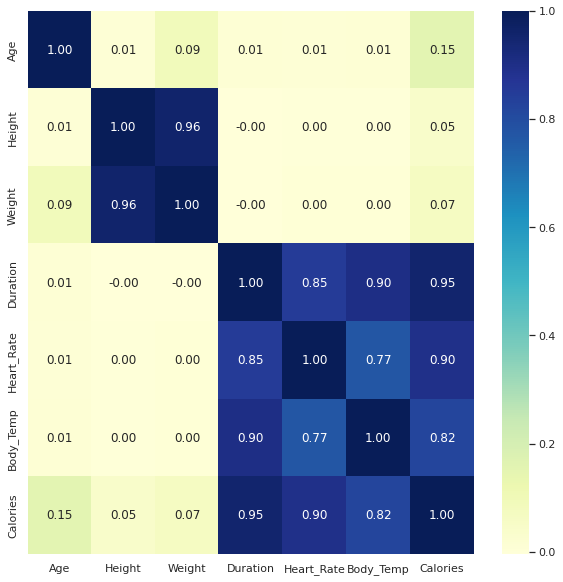

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, fmt=".2f",cmap="YlGnBu")

In [ ]:
df.groupby("Gender").mean()

,Sr_no,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,,,,,,,,
female,7534.525633,42.732812,164.407074,63.275268,15.502583,95.409326,40.019804,88.152868
male,7475.231824,42.842494,184.670206,86.827174,15.561080,95.631367,40.031138,95.953501


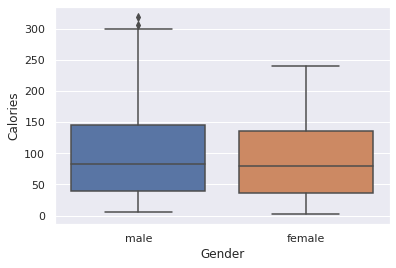

In [ ]:
sns.boxplot(data=df, x="Gender", y="Calories")

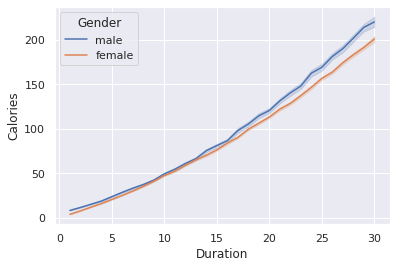

In [ ]:
sns.lineplot(data=df, x="Duration", y="Calories", hue="Gender")

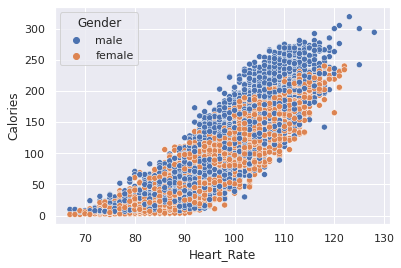

In [ ]:
sns.scatterplot(data=df, x="Heart_Rate", y="Calories", hue="Gender")

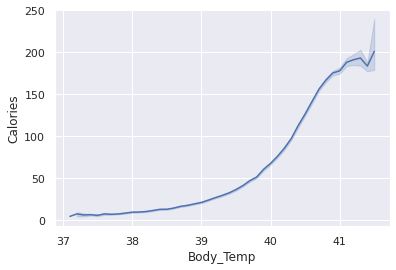

In [ ]:
sns.lineplot(data=df, x="Body_Temp", y="Calories")

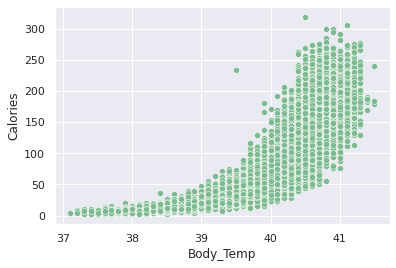

In [ ]:
sns.scatterplot(data=df, x="Body_Temp", y="Calories")

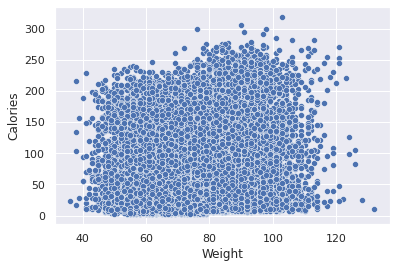

In [ ]:
sns.scatterplot(data=df, x=df['Weight'], y='Calories')

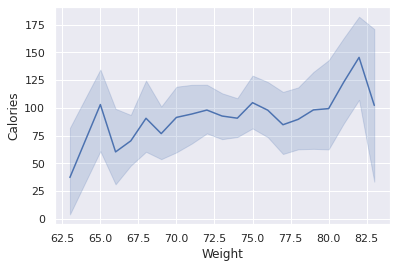

In [ ]:
sns.lineplot(data=df[df.Height == int(df.Height.mean())], x="Weight", y="Calories")

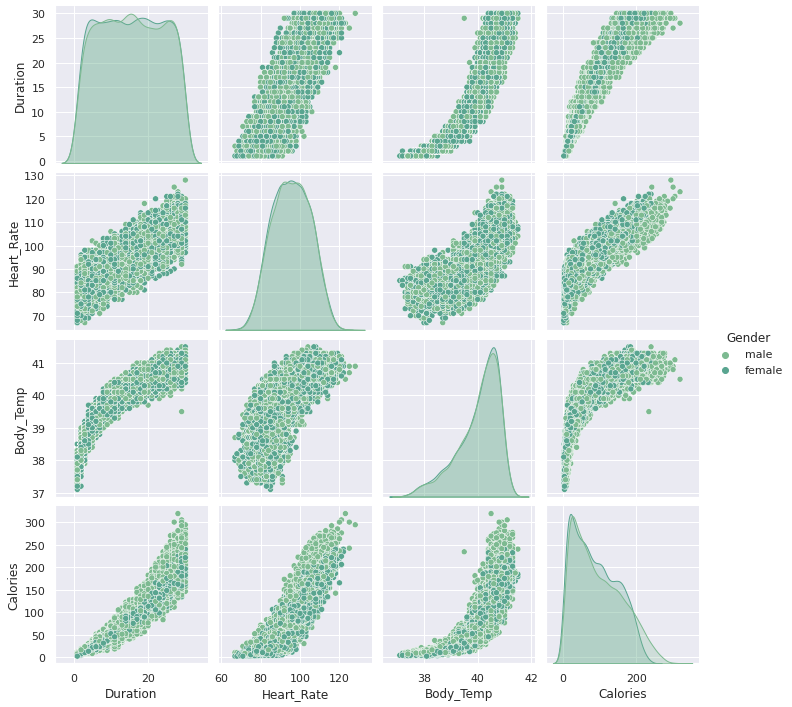

In [ ]:
sns.set_theme(palette='crest')
sns.pairplot(data=df.drop(['Sr_no','Age','Weight','Height'], axis="columns"), hue="Gender")

# Building Regression Model

In [ ]:
dfm = df.replace({"Gender":{'male':0,'female':1}}).drop(['Sr_no'], axis='columns')
dfm.head(10)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29,104.0,39.5,234.0
1,1,20,166.0,60.0,14,94.0,40.3,66.0
2,0,69,179.0,79.0,5,88.0,38.7,31.0
3,1,34,179.0,71.0,13,100.0,40.5,71.0
5,1,36,151.0,50.0,23,96.0,40.7,123.0
6,1,33,158.0,56.0,22,95.0,40.5,112.0
7,0,41,175.0,85.0,25,100.0,40.7,148.0
8,0,60,186.0,94.0,21,97.0,40.4,139.0
9,1,26,146.0,51.0,16,90.0,40.2,72.0
10,1,36,177.0,76.0,1,74.0,37.8,3.0


In [ ]:
X = dfm.drop(['Calories'], axis="columns") #independent var
y = dfm['Calories'] #dependent var

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=4)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

0.9670252374313746

In [ ]:
model.coef_

array([ -3.76372474,   0.50517935,  -0.18116969,   0.30466441,
         6.65040525,   1.98870373, -16.88009727])

In [ ]:
model.intercept_

463.5641213849982

In [ ]:
# y = 468.334 + (-3.76*Gender) + 0.5*Age + (-0.18*Height) + 0.3*Weight + 6.64*Duration + 1.99*Heart_Rate + (-16.97*Body_Temp)

## Testing our model

In [ ]:
print(model.predict(np.array([[ 0,43,204,107,13,94,38 ]]))[0],"Calories Burned 🏃🏽")

112.87703121547065 Calories Burned 🏃🏽


In [ ]:
print(model.predict(np.array([[ 1,45,165,55,17,94,38]]))[0],"Calories Burned 🏃🏽")

127.94835470315945 Calories Burned 🏃🏽
